## Data Analysis questions
    
    What is the time period that the dataset covers?
    What is the overall revenue for that time?
    Are there seasonal patterns in the evolution of sales?
    What are the most sold products?
    What are the products that generate the most revenue?

Keep the project goals in mind and be as curious, inquisitive and creative as possible, asking questions to the data.

## Project goal: suggest whether or not it’s beneficial to discount products
    The Marketing Team Lead is convinced that offering discounts is beneficial in the long run. She believes discounts improve customer acquisition, satisfaction and retention, and allow the company to grow.
    
    The main investors in the Board are worried about offering aggressive discounts. They have pointed out how the company’s recent quarterly results showed an increase in orders placed, but a decrease in the total revenue. They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.

## Original Business Questions
Your analytical and business skills are needed to provide clarity in the following aspects:

    How should products be classified into different categories to simplify reports and analysis?
    What is the distribution of product prices across different categories?
    How many products are being discounted?
    How big are the offered discounts as a percentage of the product prices?
    How do seasonality and special dates (Christmas, Black Friday) affect sales?
    How could data collection be improved?

At the end of this project (your instructor will set the exact date), you are expected to give a presentation to the company board and present the results of your analysis. The presentation needs to be concise, but also engaging and convincing.

## Answer to Data Analysis questions

In [16]:
import pandas as pd

# orders_cl.csv
orders_qlty = pd.read_csv('final_orders.csv')

# orderlines_cl.csv
orderlines_qlty = pd.read_csv('final_orderlines.csv')

# products_cl.csv
products_qlty = pd.read_csv('final_products.csv')

In [17]:
orderlines_qlty["date"] = pd.to_datetime(orderlines_qlty["date"])
orders_qlty["created_date"] = pd.to_datetime(orders_qlty["created_date"])

In [18]:
orderlines_qlty.info()
orders_qlty.info()
products_qlty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40985 non-null  int64         
 1   created_date  40985 non-null  datetime64[ns]
 2   total_paid  

In [19]:
ord_df = orders_qlty.copy()
ol_df = orderlines_qlty.copy()
prod_df = products_qlty.copy()

## What is the time period that the dataset covers?

In [20]:
ol_df.nunique()

id                  53231
id_order            40985
product_id              1
product_quantity       27
sku                  5098
unit_price           4342
date                52840
dtype: int64

In [21]:
ord_df.nunique()

order_id        40985
created_date    40914
total_paid       9878
state               1
dtype: int64

In [69]:
ord_df.created_date.describe()

count                            40985
mean     2017-09-11 14:12:53.260631808
min                2017-01-01 01:51:47
25%                2017-06-07 09:41:13
50%                2017-10-27 06:44:29
75%                2017-12-25 20:58:01
max                2018-03-14 12:03:52
Name: created_date, dtype: object

In [22]:
ord_df.created_date.max() - ord_df.created_date.min()

Timedelta('437 days 10:12:05')

## What is the overall revenue for that time?

In [23]:
ord_df.total_paid.sum()

7978675.599999999

In [24]:
print(f'The total revenue of the dataset starting on {ord_df.created_date.min()} and ending on '\
      f'{ord_df.created_date.max()} comes with a total revenue of €{round((ord_df.total_paid.sum())*1E-6,2)}M.')

The total revenue of the dataset starting on 2017-01-01 01:51:47 and ending on 2018-03-14 12:03:52 comes with a total revenue of €7.98M.


## Are there seasonal patterns in the evolution of sales?

<Axes: xlabel='created_date,created_date'>

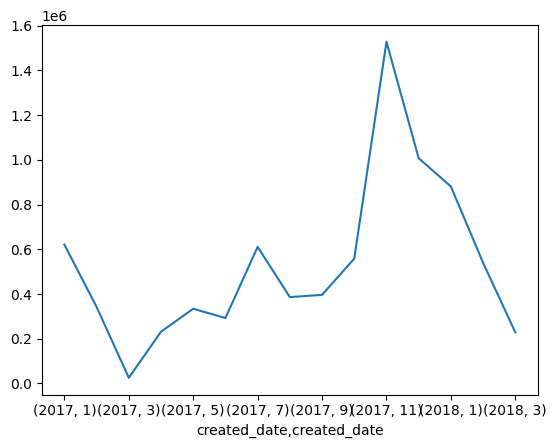

In [25]:
(
    ord_df
    .groupby([ord_df["created_date"].dt.year,
              ord_df["created_date"].dt.month,
#              ord_df["created_date"].dt.day
             ])["total_paid"]
    .sum()
 ).plot()

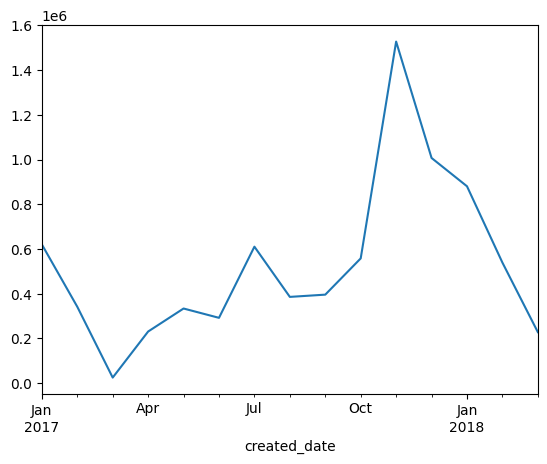

In [70]:
# the same plot can be obtained in an easier way with resample:
(
    ord_df
    .resample("M", on="created_date")["total_paid"]
    .sum()
#    .sort_values(ascending=False)
).plot();

## What are the most sold products?

In [39]:
ol_df.groupby('sku')['product_quantity'].sum().sort_values(ascending=False).head(10)

sku
APP1190    955
APP0698    820
APP1922    537
APP0927    489
WDT0183    476
SAM0074    329
CRU0051    328
APP2446    270
NTE0013    252
CRU0050    248
Name: product_quantity, dtype: int64

In [44]:
skus = ol_df.groupby('sku')['product_quantity'].sum().sort_values(ascending=False).head(10).index
prod_df[prod_df.sku.isin(skus)]#[['sku', 'name', 'desc']]

,sku,name,desc,price,in_stock,type
139,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.00,1,12655397
151,NTE0013,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",Adapter HDD / SSD 2.5 SATA 3.5 compatible with...,26.99,1,12755395
625,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230
1215,SAM0074,Samsung 850 EVO SSD Disk 500GB,SSD hard drive Mac and PC 25 inch 500GB SATA I...,179.99,1,12215397
1439,APP0927,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384
2613,APP1190,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,1,1231
4883,CRU0051,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397
5484,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,179.00,1,5384
6285,CRU0050,Crucial MX300 275GB SSD Disk,SSD 275GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,98.39,0,12215397
7991,APP2446,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray,449.33,0,21561716


## What are the products that generate the most revenue?

In [60]:
ol_df['tot_unit_price'] = ol_df.product_quantity * ol_df.unit_price
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,tot_unit_price
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [65]:
# sum of € gained for each product through all the orders:
ol_df.groupby('sku')['tot_unit_price'].sum().sort_values(ascending=False).head(20)

sku
LGE0044    135375.83
APP2446    104560.64
APP1922     86473.26
APP2477     85301.93
APP1970     80715.76
APP2072     74964.06
APP2485     70721.79
WDT0183     65589.96
APP2483     60090.08
APP2479     52981.19
APP1190     51954.97
APP1966     51473.12
SAM0074     50181.18
APP1978     47971.75
WDT0318     47737.29
APP2478     45850.62
CRU0051     44355.75
APP1971     43725.88
AP20264     41211.02
WDT0249     41175.57
Name: tot_unit_price, dtype: float64

In [68]:
skus = ol_df.groupby('sku')['tot_unit_price'].sum().sort_values(ascending=False).head(5).index

prod_df[prod_df.sku.isin(skus)]

,sku,name,desc,price,in_stock,type
5194,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.00,1,1296
5484,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,179.00,1,5384
6732,APP1970,Apple iPhone 32GB Space Gray,New iPhone SE with 4-inch screen 32 free GB.,419.00,0,51601716
7991,APP2446,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray,449.33,0,21561716
8209,APP2477,Apple iPhone 64GB Space Gray 8,Apple iPhone 64GB 8 Color Space Gray,809.00,1,113291716
